# Chapter #3: Fine-Tuning Your Model

## 1. How good is your model?

**Classification metrics**
> - Thinking back to **classification** problems, recall that **we can use accuracy, the fraction of correctly classified labels, to measure model performance**.
> - However, **accuracy is not always a useful metric**.

**Class imbalance**
> - Consider a model for **predicting whether a bank transaction is fraudulent**, where **only 1% of transactions are actually fraudulent**.
> - We could build a model that **classifies every transaction as legitimate**; this model would have an **accuracy of 99%!**
> - However, **it does a terrible job of actually predicting fraud**, so it fails at its original purpose.
> - The situation where one class is more frequent is called **class imbalance**.
> - Here, the class of **legitimate transactions** contains way **more** instances than the class of **fraudulent transactions**.
> - This is a common situation in practice and requires a **different approach to assessing the model's performance**.

**Confusion matrix for assessing classification performance**
> - Given a **binary classifier**, such as our fraudulent transactions example, we can create a **2x2 matrix** that summarizes performance called a **confusion matrix**.
> - Across the top are the **predicted labels**, and down the side are the **actual labels**.
> - Given any model, we can fill in the confusion matrix according to its predictions:
>> - The **true positives** are the number of fraudulent transactions correctly labeled,
>> - The **true negatives** are the number of legitimate transactions correctly labeled,
>> - The **false negatives** are the number of legitimate transactions incorrectly labeled,
>> - And the **false positives** are the number of transactions incorrectly labeled as fraudulent.
> - Usually, **the class of interest is called the positive class**.
>> - As we aim to detect fraud, **the positive class is an illegitimate transaction**.
> - **So, why is the confusion matrix important?**
>> - Firstly, **we can retrieve accuracy**: it's the sum of true predictions divided by the total sum of the matrix,
>> - Secondly, **there are other important metrics we can calculate from the confusion matrix**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_01_how_good_is_your_model_img01.png">

**Precision**
> - **Precision is the number of true positives divided by the sum of all positive predictions**.
> - It is also called the **positive predictive value**.
> - In our case, this is **the number of correctly labeled fraudulent transactions divided by the total number of transactions classified as fraudulent**.
> - **High precision** means having a **lower false positive rate**.
> - For our classifier, this translates to **fewer legitimate transactions being classified as fraudulent**.

**Recall**
> - **Recall is the number of true positives divided by the sum of true positives and false negatives**.
> - This is also called **sensitivity**.
> - **High recall reflects a lower false negative rate**.
> - For our classifier, it means **predicting most fraudulent transactions correctly**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_01_how_good_is_your_model_img02.png">

**F1 score**
> - The **F1-score is the harmonic mean of precision and recall**.
> - This metric **gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors**.
> - The F1 score **favors models with similar precision and recall**, and is a **useful metric if we are seeking a model which performs reasonably well across both metrics**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_01_how_good_is_your_model_img03.png">

**Confusion matrix in scikit-learn**
> - Using our churn dataset, to compute the confusion matrix, along with the metrics, we import **classification_report** and **confusion_matrix** from `sklearn.metrics`.
> - We **instantiate** our classifier, **split** the data, **fit** the training data, and **predict** the labels of the test set.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_01_how_good_is_your_model_img04.png">

**Confusion matrix in scikit-learn**
> - We pass the **test set labels** and the **predicted labels** to the **confusion matrix function**.
> - We can see `1106` true negatives in the top left.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_01_how_good_is_your_model_img05.png">

**Classification report in scikit-learn**
> - Passing the **same arguments** to **classification report** outputs **all the relevant metrics**.
> - It includes **precision** and **recall** by class, `0.76` and `0.16` for the churn class respectively, which **highlights how poorly the model's recall is on the churn class**.
> - **Support** represents the **number of instances for each class within the true labels**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_01_how_good_is_your_model_img06.png">

### 1.1. Deciding on a primary metric

As you have seen, **several metrics can be useful to evaluate the performance of classification models**, including **accuracy**, **precision**, **recall**, and **F1-score**.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

- **Possible Answers:**

> - A model predicting the presence of cancer as the positive class.
> - A classifier predicting the positive class of a computer program containing malware.
> - **A model predicting if a customer is a high-value lead for a sales team with limited capacity.**

### 1.2. Assessing a diabetes prediction classifier

In this chapter you'll work with the `diabetes_df` dataset introduced previously.

The goal is to **predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years)**. Therefore, it is a **binary classification problem**. A target value of `0` indicates that the individual does not have diabetes, while a value of `1` indicates that the individual does have diabetes.

`diabetes_df` has been preloaded for you as a `pandas` DataFrame and split into `X_train`, `X_test`, `y_train`, and `y_test`. In addition, a `KNeighborsClassifier()` has been instantiated and assigned to `knn`.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

- Set up the workspace.

In [1]:
import pickle
with open("./assets/ch03_01_02_assessing_a_diabetes_prediction_classifier_pickled01.pkl", mode="rb") as file_bin:
    pickled_objs = pickle.load(file_bin)

In [2]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

- Import `confusion_matrix` and `classification_report`.

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

- Fit the model to the training data.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
knn.fit(X_train, y_train);

- Predict the labels of the test set, storing the results as `y_pred`.

In [7]:
y_pred = knn.predict(X_test)

- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [8]:
print(confusion_matrix(y_test, y_pred))

[[116  35]
 [ 47  33]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



## 2. Logistic regression and the ROC curve

**Logistic regression and the ROC curve**
> - It's time to introduce another model: **logistic regression**.

**Logistic regression for binary classification**
> - Despite its name, **logistic regression is used for classification**.
> - This model **calculates the probability, p, that an observation belongs to a binary class**.
> - Using our diabetes dataset as an example, **if p is more than or equal to `0.5`, we label the data as `1`**, representing a prediction that an individual is more likely to have diabetes; **if p is less than `0.5`, we label it `0`** to represent that they are more likely to not have diabetes.

**Linear decision boundary**
> - Note that logistic regression produces a **linear decision boundary**, as we can see in this image.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img01.png">

**Logistic regression in scikit-learn**
> - Using logistic regression in scikit-learn **follows the same approach as used for other models**.
>> - We first **import** LogisticRegression from `sklearn.linear_model`,
>> - Next we **instantiate** the classifier, **split** our data, **fit** the model on our training data, and **predict** on our test set. 
> - We use the **churn dataset**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img02.png">

**Predicting probabilities**
> - We can **predict probabilities** of each instance belonging to a class by **calling logistic regression's `.predict_proba()` method** and **passing the test features**.
> - This returns a **2-dimensional array with probabilities for both classes**, in this case, that the individual did not churn, or did churn, respectively.
> - We slice the **second column**, representing the **positive class probabilities**, and store the results as `y_pred_probs`.
> - Here we see the model **predicts a probability** of `0.089` that the first observation **has churned**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img03.png">

**Probability thresholds**
> - The **default probability threshold** for logistic regression in scikit-learn is `0.5`.
> - This threshold can also apply to **other models** such as KNN.
> - **So, what happens as we vary this threshold?**

**The ROC curve**
> - We can use a **receiver operating characteristic**, or **ROC** curve, to visualize **how different thresholds affect true positive and false positive rates**. > - Here, the **dotted line** represents a **chance model**, which **randomly guesses labels**.
>> - When the **threshold equals zero**, the model **predicts `1`** for all observations, meaning it will **correctly predict** all positive values, and **ncorrectly predict** all negative values,
>> - If the **threshold equals `1`**, the model **predicts `0`** for all data, which means that **both true and false positive rates are zero**,
>> - If we **vary the threshold**, we get a **series of different false positive and true positive rates**.
> - A **line plot of the thresholds** helps to visualize the trend.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img04.png">

**Plotting the ROC curve**
> - To **plot the ROC curve**, we **import** `roc_curve` from `sklearn.metrics`.
> - We then **call the function roc_curve**; we **pass the test labels** as the first argument, and the **predicted probabilities** as the second. 
> - We **unpack the results into three variables**:
>> - False positive rate, `fpr`,
>> - True positive rate, `tpr`,
>> - Thresholds, `thresholds`.
> - We can then **plot a dotted line from zero to one**, along with the **FPR** and **TPR**; to produce a figure such as this.
> - This looks great, but **how do we quantify the model's performance based on this plot?**

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img05.png">
<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img06.png">

**ROC AUC**
> - If we have a model with **`1` for true positive rate and 0 for false positive rate**, this would be the **perfect model**.
> - Therefore, we **calculate the area under the ROC curve**, a metric known as **AUC**.
> - **Scores range from `0` to `1`**, with `1` being **ideal**.
> - Here, the model scores `0.67`, which is only 34% better than a **model making random guesses**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img07.png">

**ROC AUC in scikit-learn**
> - We can calculate **AUC** in scikit-learn by **importing** `roc_auc_score` from `sklearn.metrics`.
> - We **call** `roc_auc_score()`, **passing** our test labels and our predicted probabilities, calculated by using the model's `predict_proba` method on `X_test`.
> - As expected, we get a score of `0.67`.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_02_logistic_regression_and_the_roc_curve_img08.png">

### 2.1. Building a logistic regression model

In this exercise, you will **build a logistic regression model** using all features in the `diabetes_df` dataset. The model will be used to **predict the probability** of individuals in the test set having a diabetes diagnosis.

The `diabetes_df` dataset has been split into `X_train`, `X_test`, `y_train`, and `y_test`, and preloaded for you.

- Set up the workspace.

In [10]:
import pickle
with open("./assets/ch03_02_01_building_a_logistic_regression_model_pickled01.pkl", mode="rb") as file_bin:
    pickled_objs = pickle.load(file_bin)

In [11]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [12]:
import warnings
warnings.filterwarnings("ignore")

- Import `LogisticRegression`.

In [13]:
from sklearn.linear_model import LogisticRegression

- Instantiate a logistic regression model, `logreg`.

In [14]:
logreg = LogisticRegression()

- Fit the model to the training data.

In [15]:
logreg.fit(X_train, y_train);

- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as `y_pred_probs`.

In [16]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

In [17]:
for prob in y_pred_probs[:10]:
    print(f"{prob:.2f}")

0.27
0.18
0.12
0.16
0.50
0.45
0.01
0.62
0.56
0.79


### 2.2. The ROC curve

Now you have built a logistic regression model for predicting diabetes status, you can **plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes**.

The test labels, `y_test`, and the predicted probabilities of the test features belonging to the positive class, `y_pred_probs`, have been preloaded for you, along with `matplotlib.pyplot` as `plt`.

You will create a ROC curve and then interpret the results.

- Set up the wokspace.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

- Import `roc_curve`.

In [19]:
from sklearn.metrics import roc_curve

- Calculate the ROC curve values, using `y_test` and `y_pred_probs`, and unpacking the results into `fpr`, `tpr`, and `thresholds`.

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

- Plot true positive rate against false positive rate.

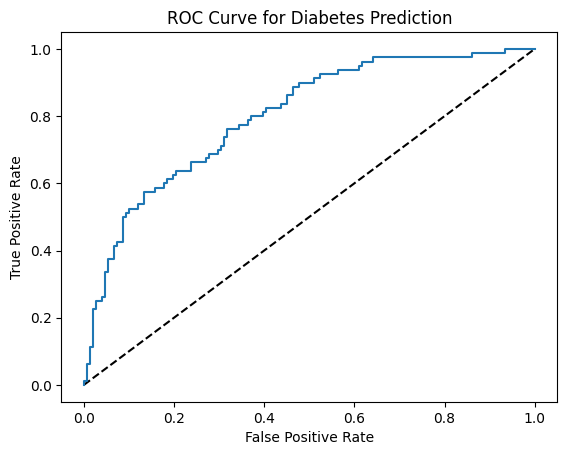

In [21]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], "k--")
ax.plot(fpr, tpr)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve for Diabetes Prediction");

Well done on producing the ROC curve for the diabetes prediction model.

But, **what does the plot tell you about the model's performance?**

> - **Possible Answers:**
>> - The model is about as good as randomly guessing the class of each observation.
>> - The model is much worse than randomly guessing the class of each observation.
>> - **The model is much better than randomly guessing the class of each observation.**
>> - It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.

### 2.3. ROC AUC

The ROC curve you plotted in the last exercise looked promising.

Now you will **compute the area under the ROC curve, along with the other classification metrics you have used previously**.

The `confusion_matrix` and `classification_report` functions have been preloaded for you, along with the `logreg` model you previously built, plus `X_train`, `X_test`, `y_train`, `y_test`. Also, the model's predicted test set labels are stored as `y_pred`, and probabilities of test set observations belonging to the positive class stored as `y_pred_probs`.

A `knn` model has also been created and the performance metrics printed in the console, so you can compare the `roc_auc_score`, `confusion_matrix`, and `classification_report` between the two models.

```
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231
```

- Set up the workspace.

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

- Import `roc_auc_score`.

In [24]:
from sklearn.metrics import roc_auc_score

- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.

In [25]:
print(roc_auc_score(y_test, y_pred_probs))

0.8002483443708608


- Calculate and print the confusion matrix.

In [26]:
print(confusion_matrix(y_test, y_pred))

[[121  30]
 [ 30  50]]


- Call `classification_report()`.

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



## 3. Hyperparameter tuning

**Hyperparameter tuning**
> - Now that we know how to **evaluate** model performance, let's explore how to **optimize** our model.

**Hyperparameter tuning**
> - Recall that:
>> - We had to choose a **value for `alpha`** in ridge and lasso regression **before fitting** it,
>> - Likewise, we choose `n_neighbors` **before fitting** and predicting KNN.
> - Parameters that we **specify before fitting a model**, like `alpha` and `n_neighbors`, are called **hyperparameters**.

**Choosing the correct hyperparameters**
> - So, a fundamental step for building a successful model is **choosing the correct hyperparameters**:
>> - We can try lots of different values,
>> - Fit all of them separately,
>> - See how well they perform,
>> - Choose the best values!
> - This is called **hyperparameter tuning**.
> - When fitting different hyperparameter values, we **use cross-validation to avoid overfitting** the hyperparameters to the test set:
>> - We can still split the data, but **perform cross-validation on the training set**,
>> - We **withhold** the test set and **use it for evaluating** the tuned model.

**Grid search cross-validation**
> - One approach for hyperparameter tuning is called **grid search**, where we choose a grid of possible hyperparameter values to try.
> - For example, we can **search across two hyperparameters** for a KNN model - the type of metric and a different number of neighbors:
>> - Here we have `n_neighbors` between `2` and `11` in increments of `3`,
>> - Two metrics: `euclidean` and `manhattan`.
> - Therefore, we can **create a grid** of values like this.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_03_hyperparameter_tuning_img01.png">


**Grid search cross-validation**
> - We perform **k-fold cross-validation for each combination** of hyperparameters.
> - The mean scores for each combination are shown here.
> - We then choose **hyperparameters that performed best**, as shown here.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_03_hyperparameter_tuning_img02.png">

**GridSearchCV in scikit-learn**
> - Let's **perform a grid search** on a regression model using our sales dataset:
>> - We **import** GridSearchCV from `sklearn.model_selection`,
>> - We **instantiate** `KFold`,
>> - We then specify the **names and values of the **hyperparameters** we wish to tune as the **keys and values of a dictionary**, `param_grid`,
>> - As always, we **instantiate** our model,
>> - We then **call** `GridSearchCV()` and **pass** it our model, the grid we wish to tune over and set `cv` equal to `kf`,
>> - This returns a **GridSearch object** that we can then **fit** to the training data, and this fit **performs the actual cross-validated grid search**,
>> - We can then **print** the model's attributes `best_params_` and `best_score_`, respectively, to retrieve the **hyperparameters that perform the best** along with the **mean cross-validation score** over that fold.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_03_hyperparameter_tuning_img03.png">

**Limitations and an alternative approach**
> - Grid search is great.
> - However, the **number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds**. 
> - Therefore, **it doesn't scale well!**
> - So, performing 3-fold cross-validation for one hyperparameter with 10 values each means **30 fits**, while 10-fold cross-validation on 3 hyperparameters with 10 values each equals **900 fits**!
> - However, there is **another way**.

**RandomizedSearchCV**
> - We can perform a **random search**, which **picks random hyperparameter values rather than exhaustively searching through all options**.
> - Let's demonstrate this approach:
>> - We **import** `RandomizedSearchCV` from `sklearn.model_selection`,
>> - We **set up** `KFold` and `param_grid`, and **instantiate** the model as before,
>> - We **call** `RandomizedSearchCV()` using the same arguments and variables as `GridSearchCV`,
<< - We can optionally **set** the `n_iter` argument, which determines the number of hyperparameter values tested.
>> - So 5-fold cross-validation with `n_iter` set to `2` performs `10` fits,
>> - Again we can access the **best hyperparameters** and their **score**.
> - In this case it is able to find the best hyperparameters from our previous grid search!

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch03_03_hyperparameter_tuning_img03.png">

**Evaluating on the test set**
> - We can evaluate model performance on the test set by **passing** it to a call of the random search object's `.score()` method.
> - It actually performs **slightly better** than the best score in our grid search!

### 3.1. Hyperparameter tuning with GridSearchCV

Now you have seen how to **perform grid search hyperparameter tuning**, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the `diabetes_df` dataset.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you. A `KFold()` object has been created and stored for you as `kf`, along with a `lasso` regression model as `lasso`.

- Set up the workspace.

In [28]:
import pickle
with open("./assets/ch03_03_01_hyperparameter_tuning_with_GridSearchCV_pickled01.pkl", mode="rb") as file_bin:
    pickled_objs = pickle.load(file_bin)

In [29]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [30]:
kf = pickled_objs["kf"]
lasso = pickled_objs["lasso"]

- Import `GridSearchCV`.

In [31]:
from sklearn.model_selection import GridSearchCV

- Set up a parameter grid for `"alpha"`, using `np.linspace()` to create 20 evenly spaced values ranging from `0.00001` to `1`.

In [32]:
import numpy as np
param_grid = {"alpha": np.linspace(1e-5, 1, num=20)}

- Call `GridSearchCV()`, passing `lasso`, the parameter grid, and setting `cv` equal to `kf`.

In [33]:
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

- Fit the grid search object to the training data to perform a cross-validated grid search.

In [34]:
lasso_cv.fit(X_train, y_train);

In [35]:
import pandas as pd
# Select columns of interest:
cols = ["params", "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = pd.DataFrame(lasso_cv.cv_results_)[cols]
# Explode & concatenate params:
params = cv_results["params"].apply(pd.Series)
cv_results = pd.concat(objs=[params, cv_results], axis=1).drop(columns="params")
# Sort and view the results:
cv_results.sort_values(by="rank_test_score", inplace=True)
cv_results.head()

,alpha,mean_test_score,std_test_score,rank_test_score
0,0.000010,0.330788,0.037451,1
1,0.052641,0.330651,0.036713,2
2,0.105272,0.330431,0.036040,3
3,0.157903,0.330109,0.035477,4
4,0.210534,0.329917,0.035008,5


In [36]:
print(f"Best parameters after tuning: {lasso_cv.best_params_}")
print(f"Best score after tuning: {lasso_cv.best_score_:.2f}")

Best parameters after tuning: {'alpha': 1e-05}
Best score after tuning: 0.33


### 3.2. Hyperparameter tuning with RandomizedSearchCV

As you saw, **`GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space**. In this case, you can use **`RandomizedSearchCV`**, which **tests a fixed number of hyperparameter settings from specified probability distributions**.

Training and test sets from diabetes_df have been pre-loaded for you as `X_train`. `X_test`, `y_train`, and `y_test`, where the target is `"diabetes"`. A logistic regression model has been created and stored as `logreg`, as well as a `KFold()` object stored as `kf`.

You will define a range of hyperparameters and use `RandomizedSearchCV`, which has been imported from `sklearn.model_selection`, to look for optimal hyperparameters from these options.

- Set up the workspace.

In [37]:
import pickle
with open("./assets/ch03_03_02_hyperparameter_tuning_with_RandomizedSearchCV_pickled01.pkl", mode="rb") as file_bin:
    pickled_objs = pickle.load(file_bin)

In [38]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [39]:
kf = pickled_objs["kf"]
logreg = pickled_objs["logreg"]

In [40]:
import warnings
warnings.filterwarnings("ignore")

- Create `param_dist`, adding `"l1"` and `"l2"` as `penalty` values, setting `C` to a range of 50 float values between` 0.1` and `1.0`, and `class_weight` to either `"balanced"` or a dictionary `{0: 0.8, 1: 0.2}`.

In [41]:
import numpy as np
param_dist = {"penalty": ["l1", "l2"],
              "tol": np.linspace(1e-4, 1.0, num=50),
              "C": np.linspace(0.1, 1.0, num=50),
              "class_weight": ["balanced", {0: 0.8, 1: 0.2}]}

- Create the Randomized Search CV object, passing the model and the parameters, and setting `cv` equal to `kf`.

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
logreg_cv = RandomizedSearchCV(logreg, param_dist, cv=kf)

- Fit `logreg_cv` to the training data.

In [44]:
logreg_cv.fit(X_train, y_train);

- Print the model's best parameters and accuracy score.

In [45]:
import pandas as pd
# Select columns of interest:
cols = ["params", "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = pd.DataFrame(logreg_cv.cv_results_)[cols]
# Explode & concatenate params:
params = cv_results["params"].apply(pd.Series)
cv_results = pd.concat(objs=[params, cv_results], axis=1).drop(columns="params")
# Sort and view the results:
cv_results.sort_values(by="rank_test_score", inplace=True)
cv_results.head()

,tol,penalty,class_weight,C,mean_test_score,std_test_score,rank_test_score
4,0.204161,l2,balanced,0.981633,0.737865,0.035660,1
6,0.693908,l2,balanced,0.724490,0.736226,0.033491,2
3,0.081724,l2,balanced,0.963265,0.733000,0.042656,3
8,0.734720,l2,balanced,0.963265,0.733000,0.042656,3
2,0.612284,l2,"{0: 0.8, 1: 0.2}",0.246939,0.706904,0.036992,5


In [46]:
print(f"Best parameters after tuning: {logreg_cv.best_params_}")
print(f"Best score after tuning: {logreg_cv.best_score_:.2f}")

Best parameters after tuning: {'tol': 0.2041612244897959, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9816326530612246}
Best score after tuning: 0.74
